# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [2]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [3]:
# Load the data file into a DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [4]:
# print the general/summary information about the DataFrame

data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# print a sample of 
data.head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17




There are 5125 entries total. Among the 13 columns, 5 of them have less than 5125. This means that 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd' all have missing values. Additionally, the price column seems to have many outliers. There are many vehicles that are on sale for only 1 dollar. There is also at least 1 outlier on the higher end. An older truck that is going for 375000 dollars. These must be errors as they are vastly different from the values of the car.


There are 5 columns with missing values. The 'is_4wd' column has the most missing values. It appears that this column only has entries if the vehicle has 4wd and all other entries are NaN. These values will be replaced with 0 so that a ratio of 4wd to non-4wd can be calculated.

### Conclusions and further steps


Outliers need to be addressed in the price category and perhaps in the odometer category. Missing values need to be addressed. Trends will be analyzed; the most important price-affecting factors will be charted against price in order to determine the extent of the affect.

## Treat missing values (if any)

In [6]:
#Missing values in 'is_4wd' will be replaced with 0
data['is_4wd'].fillna(0, inplace=True)
#Confirm that values have been replaced
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [7]:
#All other columns with missing data besides 'paint_color' contain values that greatly affect price.
#All rows with missing data besides 'paint_color' will be deleted
data = data.dropna(subset=['model_year', 'cylinders', 'odometer'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         36419 non-null  int64  
 1   model_year    36419 non-null  float64
 2   model         36419 non-null  object 
 3   condition     36419 non-null  object 
 4   cylinders     36419 non-null  float64
 5   fuel          36419 non-null  object 
 6   odometer      36419 non-null  float64
 7   transmission  36419 non-null  object 
 8   type          36419 non-null  object 
 9   paint_color   29916 non-null  object 
 10  is_4wd        36419 non-null  float64
 11  date_posted   36419 non-null  object 
 12  days_listed   36419 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 3.9+ MB


At least 70% of the dataset remains intact. This will be sufficient to draw our conclusions.

## Enrich data

In [8]:
# Add datetime values for when the ad was placed
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')


In [9]:
# Add the vehicle's age when the ad was placed
data['vehicle_age'] = (pd.DatetimeIndex(data['date_posted']).year)
data['vehicle_age'] = data['vehicle_age'] - data['model_year'] + 1

In [10]:
# Add the vehicle's average mileage per year
data['average_mileage'] = (data['odometer'] / data['vehicle_age'])

data.head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,8.0,18125.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714.285714
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0,26967.666667
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5.0,11590.800000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.0,19803.000000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7.0,15639.000000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,7.0,14882.000000
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,8.0,16051.625000
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29,8.0,13892.750000
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,8.0,17592.750000


In [11]:
# It might help to replace the condition values with something that can be manipulated more easily

data['condition'].replace(['new', 'like new', 'excellent', 'good', 'fair', 'salvage'], [5, 4, 3, 2, 1, 0], inplace=True)

## Check clean data

In [12]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            36419 non-null  int64         
 1   model_year       36419 non-null  float64       
 2   model            36419 non-null  object        
 3   condition        36419 non-null  int64         
 4   cylinders        36419 non-null  float64       
 5   fuel             36419 non-null  object        
 6   odometer         36419 non-null  float64       
 7   transmission     36419 non-null  object        
 8   type             36419 non-null  object        
 9   paint_color      29916 non-null  object        
 10  is_4wd           36419 non-null  float64       
 11  date_posted      36419 non-null  datetime64[ns]
 12  days_listed      36419 non-null  int64         
 13  vehicle_age      36419 non-null  float64       
 14  average_mileage  36419 non-null  float

In [13]:
# print a sample of data

data.head(50)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,8.0,18125.000000
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714.285714
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0,26967.666667
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5.0,11590.800000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.0,19803.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7.0,15639.000000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,7.0,14882.000000
10,19500,2011.0,chevrolet silverado 1500,3,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38,8.0,16051.625000
11,8990,2012.0,honda accord,3,4.0,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29,8.0,13892.750000
12,18990,2012.0,ram 1500,3,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,8.0,17592.750000


## Study core parameters



The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

<AxesSubplot:xlabel='odometer_categories'>

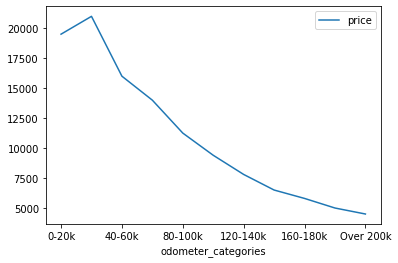

In [14]:
## Mileage will be categorized and then plotted based on median price values
def odometer_cat(row):
    odometer = row['odometer']
    
    if 0 <= odometer <= 20000:
        return '0-20k'
    if 20000 < odometer <= 40000:
        return '20-40k'
    if 40000 < odometer <= 60000:
        return '40-60k'
    if 60000 < odometer <= 80000:
        return '60-80k'
    if 80000 < odometer <= 100000:
        return '80-100k'
    if 100000 < odometer <= 120000:
        return '100-120k'
    if 120000 < odometer <= 140000:
        return '120-140k'
    if 140000 < odometer <= 160000:
        return '140-160k'    
    if 160000 < odometer <= 180000:
        return '160-180k'
    if 180000 < odometer <= 200000:
        return '180-200k'
    return 'Over 200k'

data['odometer_categories'] = data.apply(odometer_cat, axis=1)
odometer_plot = data.pivot_table(index='odometer_categories', values= 'price', aggfunc='median')
odom_sort =  [1, 6, 7, 8, 9, 10, 2, 3, 4, 5, 11]
odometer_plot['odom_sort'] = odom_sort
odometer_plot.sort_values('odom_sort', inplace=True)
odometer_plot.drop('odom_sort', inplace=True, axis=1)
odometer_plot.plot()


<AxesSubplot:xlabel='age_category'>

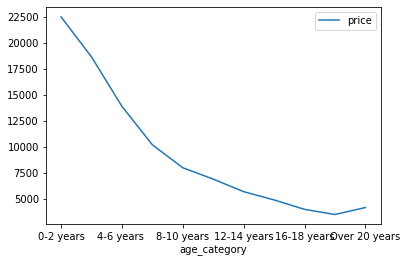

In [15]:
# Vehicle age will be categorized and then plotted based on median price values

def age_cat(row):
    age = row['vehicle_age']
    
    if 0 <= age <= 2:
        return '0-2 years'
    if 2 < age <= 4:
        return '2-4 years'
    if 4 < age <= 6:
        return '4-6 years '
    if 6 < age <= 8:
        return '6-8 years'
    if 8 < age <= 10:
        return '8-10 years'
    if 10 < age <= 12:
        return '10-12 years'
    if 12 < age <= 14:
        return '12-14 years'
    if 14 < age <= 16:
        return '14-16 years'    
    if 16 < age <= 18:
        return '16-18 years'
    if 18 < age <= 20:
        return '18-20 years'
    return 'Over 20 years'

data['age_category'] = data.apply(age_cat, axis=1)
age_plot = data.pivot_table(index='age_category', values= 'price', aggfunc='median')
age_sort = [1, 6, 7, 8, 9, 10, 2, 3, 4, 5, 11]
age_plot['age_sort'] = age_sort
age_plot.sort_values('age_sort', inplace=True)
age_plot.drop('age_sort', inplace=True, axis=1)
age_plot.plot()

<AxesSubplot:xlabel='cylinders'>

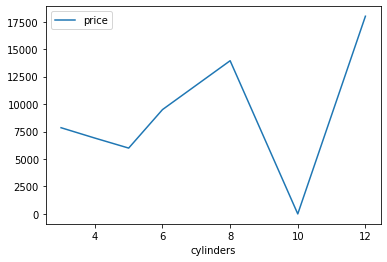

In [16]:
cylinders_plot = data.pivot_table(index='cylinders', values= 'price', aggfunc='median')
cylinders_plot.plot()

<AxesSubplot:xlabel='condition'>

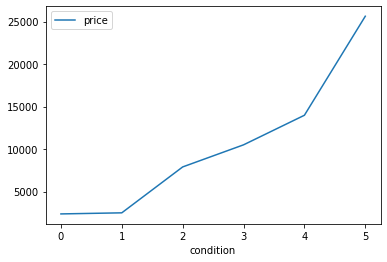

In [17]:
condition_plot = data.pivot_table(index='condition', values= 'price', aggfunc='median')
condition_plot.plot()

## Study and treat outliers



In [18]:
# Determine the lower limits for outliers
# lower outlier will be determined using the formula: 
# Lower limits = Q1 - 1.5*IQR
priceq1 = data['price'].quantile(0.25)
priceq3 = data['price'].quantile(0.75)
priceiqr = priceq3 - priceq1
pricelower = priceq1 - 1.5*priceiqr

odomq1 = data['odometer'].quantile(0.25)
odomq3 = data['odometer'].quantile(0.75)
odomiqr = odomq3 - odomq1
odomlower = odomq1 - 1.5*odomiqr

ageq1 = data['vehicle_age'].quantile(0.25)
ageq3 = data['vehicle_age'].quantile(0.75)
ageiqr = ageq3 - ageq1
agelower = ageq1 - 1.5*ageiqr

In [19]:
# Determine the upper limits for outliers
# Upper limits = Q3 + 1.5*IQR
priceupper = priceq3 + 1.5*priceiqr
odomupper = odomq3 + 1.5*odomiqr
ageupper = ageq3 + 1.5*ageiqr

outliers = {'Upper': [priceupper, odomupper, ageupper], 'Lower': [pricelower, odomlower, agelower]}
outliers_df = pd.DataFrame(data=outliers, index = ['price', 'odometer', 'age'])
outliers_df

,Upper,Lower
price,34750.0,-12850.0
odometer,282719.0,-57865.0
age,25.0,-7.0


Theoretical lower limits are all lower than any actual point values. Lower limits will be ignored. Upper limits are valid. All data above upper limits will be deleted.

In [20]:
# Store data without outliers in a separate DataFrame
data2 = data.query('price < 34750')
data2 = data2.query('odometer < 282719')
data2 = data2.query('vehicle_age < 24')

data2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,average_mileage,odometer_categories,age_category
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,8.0,18125.000000,140-160k,6-8 years
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7.0,15714.285714,100-120k,6-8 years
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.0,26967.666667,80-100k,2-4 years
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5.0,11590.800000,40-60k,4-6 years
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.0,19803.000000,60-80k,2-4 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,3,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,14.0,7871.428571,100-120k,12-14 years
51520,9249,2013.0,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,6.0,14689.333333,80-100k,4-6 years
51521,2700,2002.0,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,17.0,10676.470588,180-200k,16-18 years
51522,3950,2009.0,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,10.0,12800.000000,120-140k,8-10 years


## Study core parameters without outliers

<AxesSubplot:xlabel='odometer_categories'>

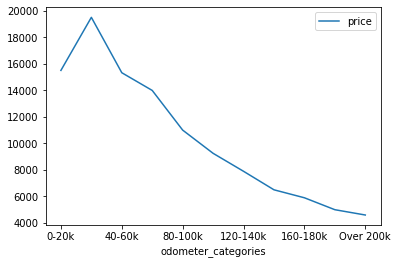

In [21]:
# Mileage without outliers
odometer_plot2 = data2.pivot_table(index='odometer_categories', values= 'price', aggfunc='median')
odometer_plot2['odom_sort'] = odom_sort
odometer_plot2.sort_values('odom_sort', inplace=True)
odometer_plot2.drop('odom_sort', inplace=True, axis=1)
odometer_plot2.plot()

In [22]:
odometer_price = data2.pivot_table(index='odometer', values= 'price', aggfunc='median')

In [23]:
odometer_price.reset_index(inplace=True)

<AxesSubplot:xlabel='odometer', ylabel='price'>

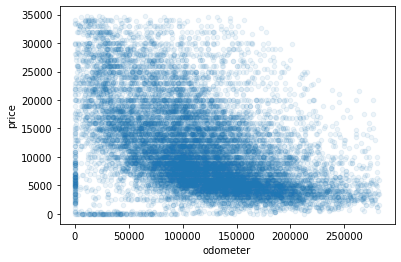

In [24]:
odometer_price.plot(kind='scatter', x='odometer', y='price', alpha= 0.08)

<AxesSubplot:xlabel='odometer', ylabel='price'>

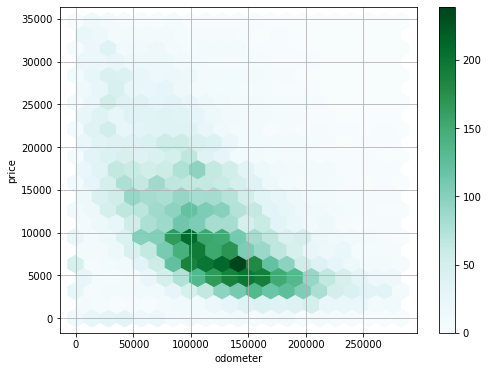

In [25]:
odometer_price.plot(kind='hexbin', x='odometer', y='price', gridsize=20, figsize=(8,6), sharex=False, grid=True)

<AxesSubplot:xlabel='age_category'>

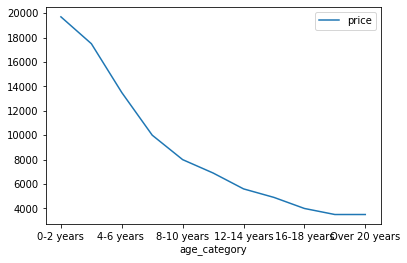

In [26]:
age_plot2 = data2.pivot_table(index='age_category', values= 'price', aggfunc='median')
age_plot2['age_sort'] = age_sort
age_plot2.sort_values('age_sort', inplace=True)
age_plot2.drop('age_sort', inplace=True, axis=1)
age_plot2.plot()

<AxesSubplot:xlabel='vehicle_age'>

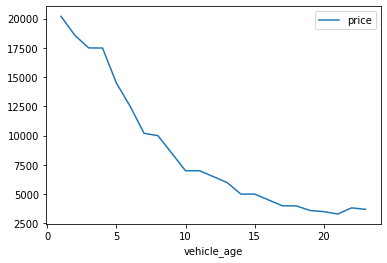

In [27]:
data2.pivot_table(index='vehicle_age', values= 'price', aggfunc='median').plot()

<AxesSubplot:xlabel='cylinders'>

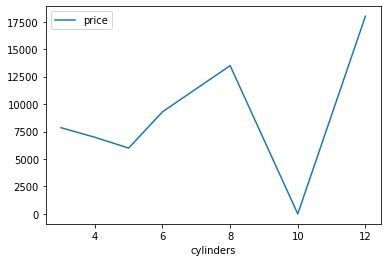

In [28]:
cylinders_plot2 = data2.pivot_table(index='cylinders', values= 'price', aggfunc='median')
cylinders_plot2.plot()

<AxesSubplot:xlabel='condition'>

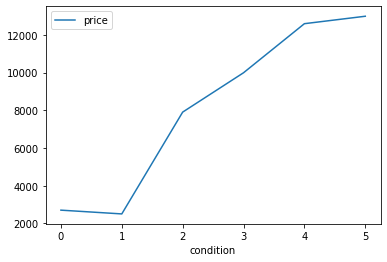

In [29]:
condition_plot2 = data2.pivot_table(index='condition', values= 'price', aggfunc='median')
condition_plot2.plot()

The graphs are generally similar between the original dataset and the revised version. The biggest difference was in condition. After outliers were removed, the trend for condition showed vehicles depreciating in value slower than was previously estimated.

## Ads lifetime



In [30]:
# Mean number of days ads were listed
data2['days_listed'].mean()

39.64535139414196

In [31]:
# Median number of days ads were listed
data2['days_listed'].median()

33.0

In [32]:
adq1 = data['days_listed'].quantile(0.25)
adq3 = data['days_listed'].quantile(0.75)
adiqr = adq3 - adq1
adlower = adq1 - 1.5*adiqr
adupper = adq3 + 1.5*adiqr 

In [33]:
adlower

-32.0

In [34]:
adupper

104.0

The typical lifetime can be determined by calculating the outliers. In the case of the ads, the theoretical lower limit for outliers is a negative number so we will ignore it. The upper limit is 104. Therefore, the typical lifetime of an ad is 104 days. If an ad was up for more than 104 days, it was up for an abnormally long time.

## Average price per each type of vehicle

<AxesSubplot:xlabel='type'>

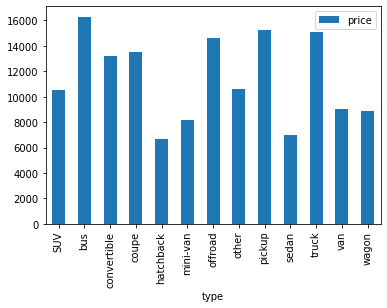

In [35]:
# Average price for each type of vehicle
data2.pivot_table(index= 'type', values='price').plot(kind='bar')

<AxesSubplot:xlabel='type'>

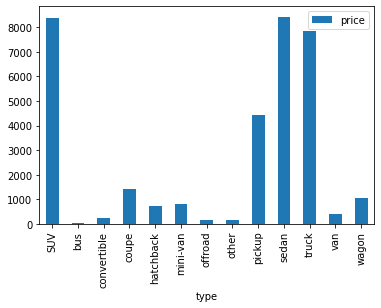

In [36]:
# Number of ads for each type of vehicle
data2.pivot_table(index='type', values= 'price', aggfunc='count').plot(kind='bar')

The bus had the highest mean value of all the vehicle types. The lowest mean value was the hatchback, followed closely by the sedan. Sedans and SUVs were the most common advertisements while buses, offroad vehicles, convertibles, and other miscellaneous vehicle types were the least common advertisements. 

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [37]:
cor_data = data2[['price', 'cylinders', 'odometer', 'vehicle_age', 'condition']].copy()
cor_data.head(50)


,price,cylinders,odometer,vehicle_age,condition
0,9400,6.0,145000.0,8.0,2
2,5500,4.0,110000.0,7.0,4
4,14900,4.0,80903.0,3.0,3
5,14990,6.0,57954.0,5.0,3
6,12990,4.0,79212.0,4.0,3
7,15990,6.0,109473.0,7.0,3
8,11500,4.0,104174.0,7.0,3
10,19500,8.0,128413.0,8.0,3
11,8990,4.0,111142.0,8.0,3
12,18990,8.0,140742.0,8.0,3


In [38]:
cor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34107 entries, 0 to 51523
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        34107 non-null  int64  
 1   cylinders    34107 non-null  float64
 2   odometer     34107 non-null  float64
 3   vehicle_age  34107 non-null  float64
 4   condition    34107 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.6 MB


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='cylinders', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='odometer', ylabel='cylinders'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='cylinders'>,
        <AxesSubplot:xlabel='condition', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='cylinders', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='vehicle_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='vehicle_age'>,
        <AxesSubplot:xlabel='cylinders', 

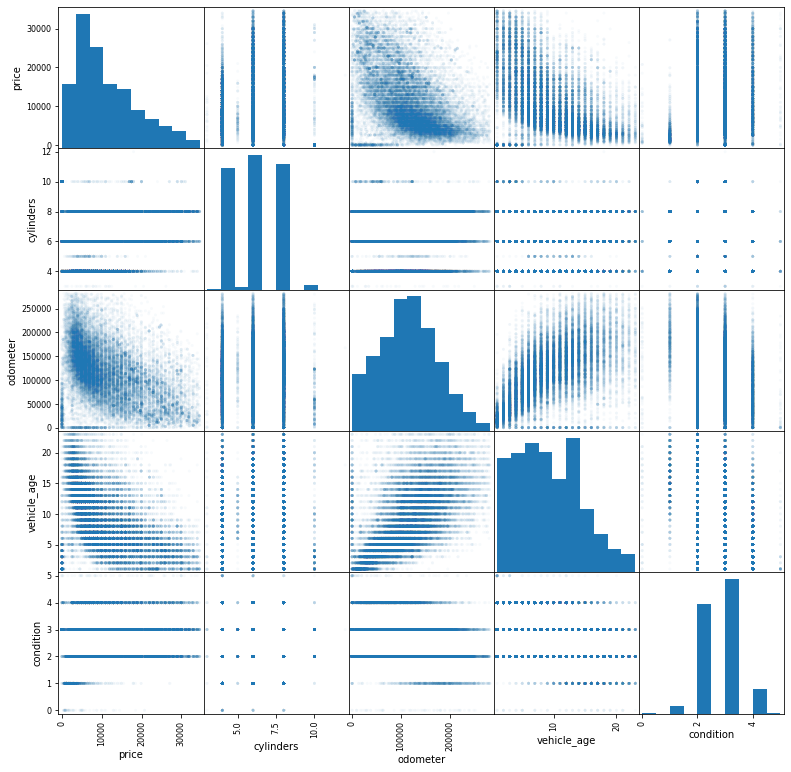

In [39]:
pd.plotting.scatter_matrix(cor_data, figsize=(13,13), alpha= 0.03)

In [40]:
cor_data.corr()

,price,cylinders,odometer,vehicle_age,condition
price,1.000000,0.305157,-0.434610,-0.533651,0.184784
cylinders,0.305157,1.000000,0.123864,0.146524,-0.080432
odometer,-0.434610,0.123864,1.000000,0.591253,-0.277018
vehicle_age,-0.533651,0.146524,0.591253,1.000000,-0.279033
condition,0.184784,-0.080432,-0.277018,-0.279033,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe62bfb8f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe62bf04670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe62bfb8c10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe62bf04d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe62bf110d0>,
 'means': []}

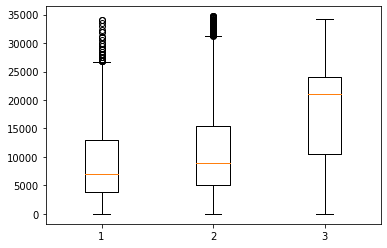

In [50]:
manual = data2.loc[data2['transmission'] == 'manual']['price']
automatic = data2.loc[data2['transmission'] == 'automatic'] ['price']
other = data2.loc[data2['transmission'] == 'other'] ['price']

transmission = [manual, automatic, other]
plt.boxplot(transmission)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe6301f4e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe630203520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe6301f4ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe630203be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe630203f40>,
 'means': []}

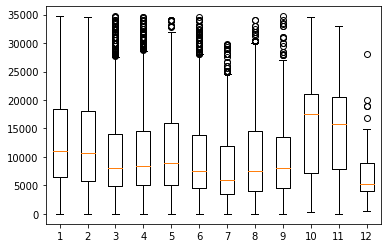

In [47]:
white = data2.loc[data2['paint_color'] == 'white']['price']
black = data2.loc[data2['paint_color'] == 'black']['price']
silver = data2.loc[data2['paint_color'] == 'silver']['price']
grey = data2.loc[data2['paint_color'] == 'grey']['price']
red = data2.loc[data2['paint_color'] == 'red']['price']
blue = data2.loc[data2['paint_color'] == 'blue']['price']
green = data2.loc[data2['paint_color'] == 'green']['price']
brown = data2.loc[data2['paint_color'] == 'brown']['price']
custom = data2.loc[data2['paint_color'] == 'custom']['price']
yellow = data2.loc[data2['paint_color'] == 'yellow']['price']
orange = data2.loc[data2['paint_color'] == 'orange']['price']
purple = data2.loc[data2['paint_color'] == 'purple']['price']
colors = [white, black, silver, grey, red, blue, green, brown, custom, yellow, orange, purple]
plt.boxplot(colors)

The data shows that the most factor that affects price the most is vehicle age, with a negative correlation of -0.53. Odometer is a close second with a negative correlation of -0.44. Condition and number of cylinders does not affect price as much. This is most likely due to the fact that it is common to find expensive cars with few cylinders or cheap cars with more cylinders. The same could be said for condition. 

For categorical values, the data shows that automatic cars are worth slightly more than their manual counterparts while the 'other' category is the most valuable. For vehicle color, yellow and orange are the most valueable while blue and green cars (along with 'other') are the least valueable. 

## General conclusion



Most missing values were deleted from this analysis. Missing values for paint were not deleted in order to preserve as much data as possible and because paint color is not as effective of a determinant on vehicle price. All calculated outliers were also deleted in order to preserve the integrity of the dataset.

The most significant conclusion from this analysis is that the vehicle age and the mileage are the most important factors when determining the price of a used vehicle. Another important conclusion is that when deleting outliers the data shows that the price of a new car remains stable for longer than was previously considered. The outliers skewed the data to show a very quick dropoff of price after a vehicle is no longer new but this analyis proved otherwise. 